# Visión por Computadora I - 2025 - B3 - Trabajo práctico 3
**Inteligencia Artificial - CEIA - FIUBA**

## Autores

- **Mendoza Dante**.
- **Vasquez Jorge**.
- **Viñas Gustavo**.

# 💻 TP3 - Parte 1.

(4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos.

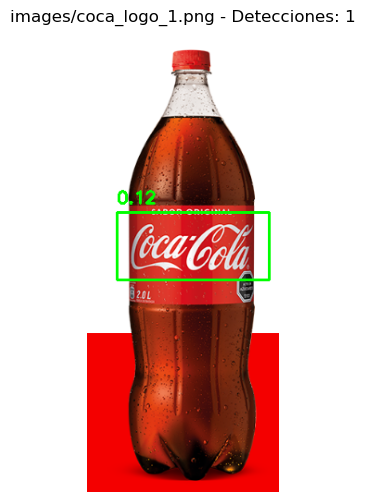

images/coca_logo_1.png: 1 detecciones con escalado (score máx. >= 0.2)


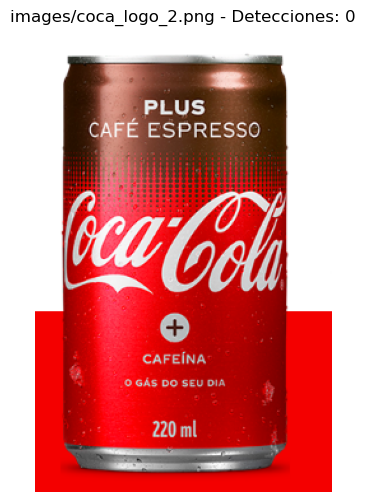

images/coca_logo_2.png: Sin detecciones (score máx. < 0.2)


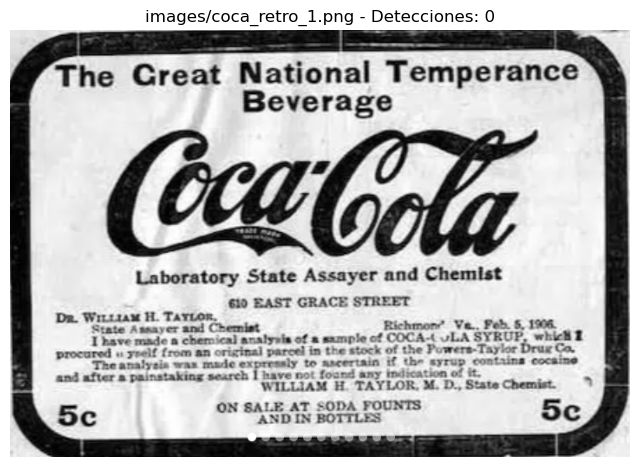

images/coca_retro_1.png: Sin detecciones (score máx. < 0.2)


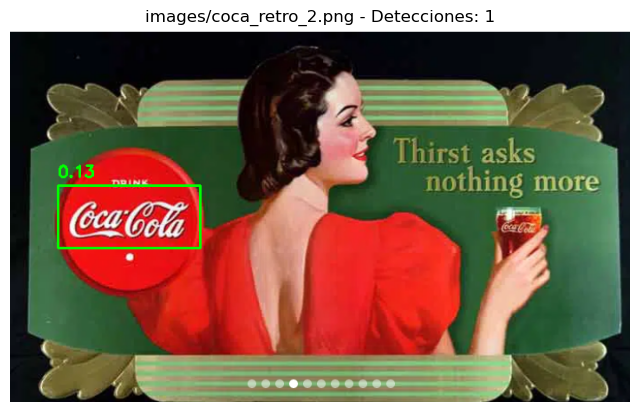

images/coca_retro_2.png: 1 detecciones con escalado (score máx. >= 0.2)


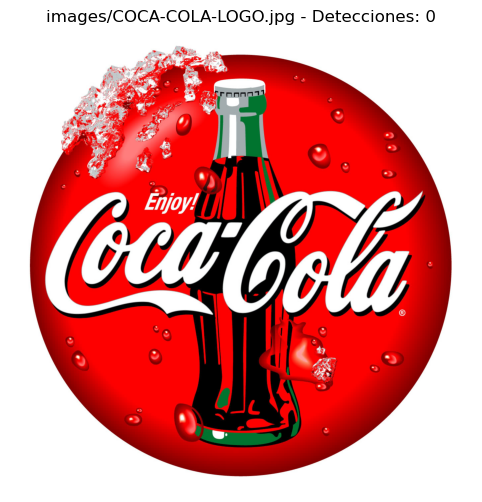

images/COCA-COLA-LOGO.jpg: Sin detecciones (score máx. < 0.2)


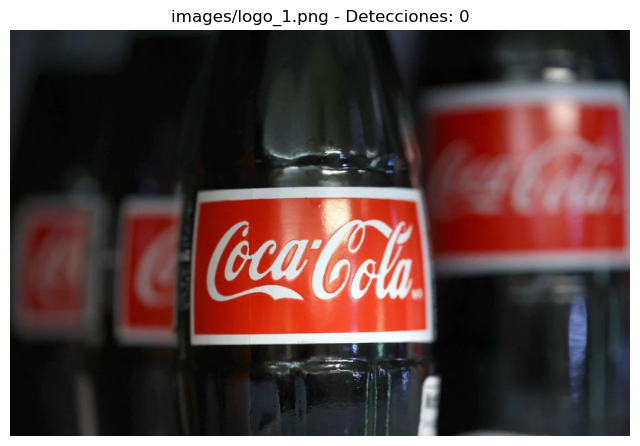

images/logo_1.png: Sin detecciones (score máx. < 0.2)


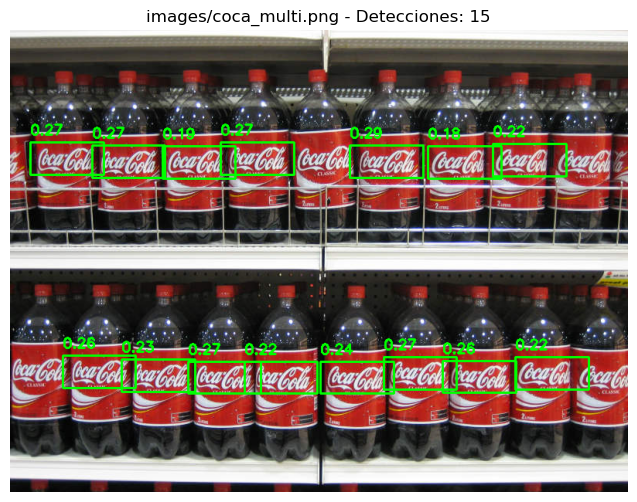

images/coca_multi.png: 15 detecciones con escalado (score máx. >= 0.2)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

# Lista de imágenes a procesar (incluimos coca_multi.png)
image_files = [
    "images/coca_logo_1.png",
    "images/coca_logo_2.png",
    "images/coca_retro_1.png",
    "images/coca_retro_2.png",
    "images/COCA-COLA-LOGO.jpg",
    "images/logo_1.png",
    "images/coca_multi.png"
]

# Cargamos el template
template = cv2.imread("template/pattern.png", cv2.IMREAD_GRAYSCALE)
max_template_width = 100
if template.shape[1] > max_template_width:
    scale_factor = max_template_width / template.shape[1]
    template = cv2.resize(template, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

template_edges = cv2.Canny(template, 50, 150)
tH, tW = template_edges.shape[:2]

# Threshold de score
threshold = 0.20  # Solo con un valor bajo se consiguio detecciones

# Escalas a probar (pyramid scaling)
scale_factors = np.linspace(0.5, 1.5, 10)  # probar valores 50% hasta 150%

# Procesamos cada imagen
for filename in image_files:
    img = cv2.imread(filename)
    if img is None:
        print(f"{filename}: no se pudo cargar.")
        continue

    gray_original = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    all_rects = []
    all_scores = []

    for scale in scale_factors:
        # Escalamos imagen
        gray = cv2.resize(gray_original, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

        if gray.shape[0] < tH or gray.shape[1] < tW:
            continue  # comprobamos si la imagen es más chica que el template

        # Canny
        gray_edges = cv2.Canny(gray, 50, 150)

        # Matching
        result = cv2.matchTemplate(gray_edges, template_edges, cv2.TM_CCOEFF_NORMED)

        # Todas las detecciones sobre el threshold que definimos
        (y_coords, x_coords) = np.where(result >= threshold)

        for (x, y) in zip(x_coords, y_coords):
            # Volvemos a las coordenadas originales
            startX = int(x / scale)
            startY = int(y / scale)
            endX = int((x + tW) / scale)
            endY = int((y + tH) / scale)
            all_rects.append([startX, startY, endX, endY])
            all_scores.append(result[y, x])

    # Aplicamos NMS
    boxes = non_max_suppression(np.array(all_rects), probs=np.array(all_scores), overlapThresh=0.3)

    # Dibujamos los bounding boxes
    for (startX, startY, endX, endY) in boxes:
        roi = gray_original[startY:endY, startX:endX]
        if roi.size == 0:
            continue
        score = np.max(cv2.matchTemplate(cv2.Canny(roi, 50, 150), template_edges, cv2.TM_CCOEFF_NORMED))
        cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(img, f"{score:.2f}", (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Mostramos la imagen final
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{filename} - Detecciones: {len(boxes)}")
    plt.axis("off")
    plt.show()

    if len(boxes) == 0:
        print(f"{filename}: Sin detecciones (score máx. < {threshold})")
    else:
        print(f"{filename}: {len(boxes)} detecciones con escalado (score máx. >= {threshold})")


# 💻 TP3 - Parte 2.

(4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1.

# 💻 TP3 - Parte 3.

(2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.